<a href="https://colab.research.google.com/github/bot9066/APA/blob/main/Amazon_Prime_EDA_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Amazon Prime Video EDA

##### **Project Type** - EDA##### *
*Contribution** - Individual##### *
*Team Member 1 -** Kailash Patidar

# **Project Summary -**

This project performs Exploratory Data Analysis (EDA) on the catalog of Amazon Prime Video content available in the United States.Using metadata and cast/crew datasets, we explore the distribution of content types (TV shows vs. Movies), genre popularity, ratings (IMDb), runtime, production trends, and top contributors (actors/directors). The goal is to extract data-driven insights to understand what types of content are most common and popular on Amazon Prime, and how these trends have evolved over time.

# **GitHub Link -**

https://github.com/bot9066/APA

# **Problem Statement**

Amazon Prime has thousands of movies and TV shows, but how can we understand what types of content dominate the platform? What genres, runtimes, and ratings are common? Who are the most frequent actors? This analysis answers those questions using EDA.

#### **Define Your Business Objective?**

- Identify popular genres and content types- Understand content trends by release year- Discover most frequent actors and high-rated content- Help guide data-driven content decisions for Amazon Prime

## 📥 Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')

## 📂 Load Data from GitHub

In [7]:
titles = pd.read_csv("https://raw.githubusercontent.com/bot9066/APA/main/titles.csv")
credits = pd.read_csv("https://raw.githubusercontent.com/bot9066/APA/main/credits.csv")

## 📄 Dataset Overview

In [8]:
titles.head()
credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


## 🔢 Dataset Dimensions

In [9]:
print(titles.shape)
print(credits.shape)

(9871, 15)
(124235, 5)


## 🔍 Data Info

In [10]:
titles.info()
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

## 🧹 Duplicate & Missing Values

In [11]:
print("Titles duplicates:", titles.duplicated().sum())
print("Credits duplicates:", credits.duplicated().sum())
titles.isnull().sum()

Titles duplicates: 3
Credits duplicates: 56


,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


## 🧩 Missing Values Matrix

<Axes: >

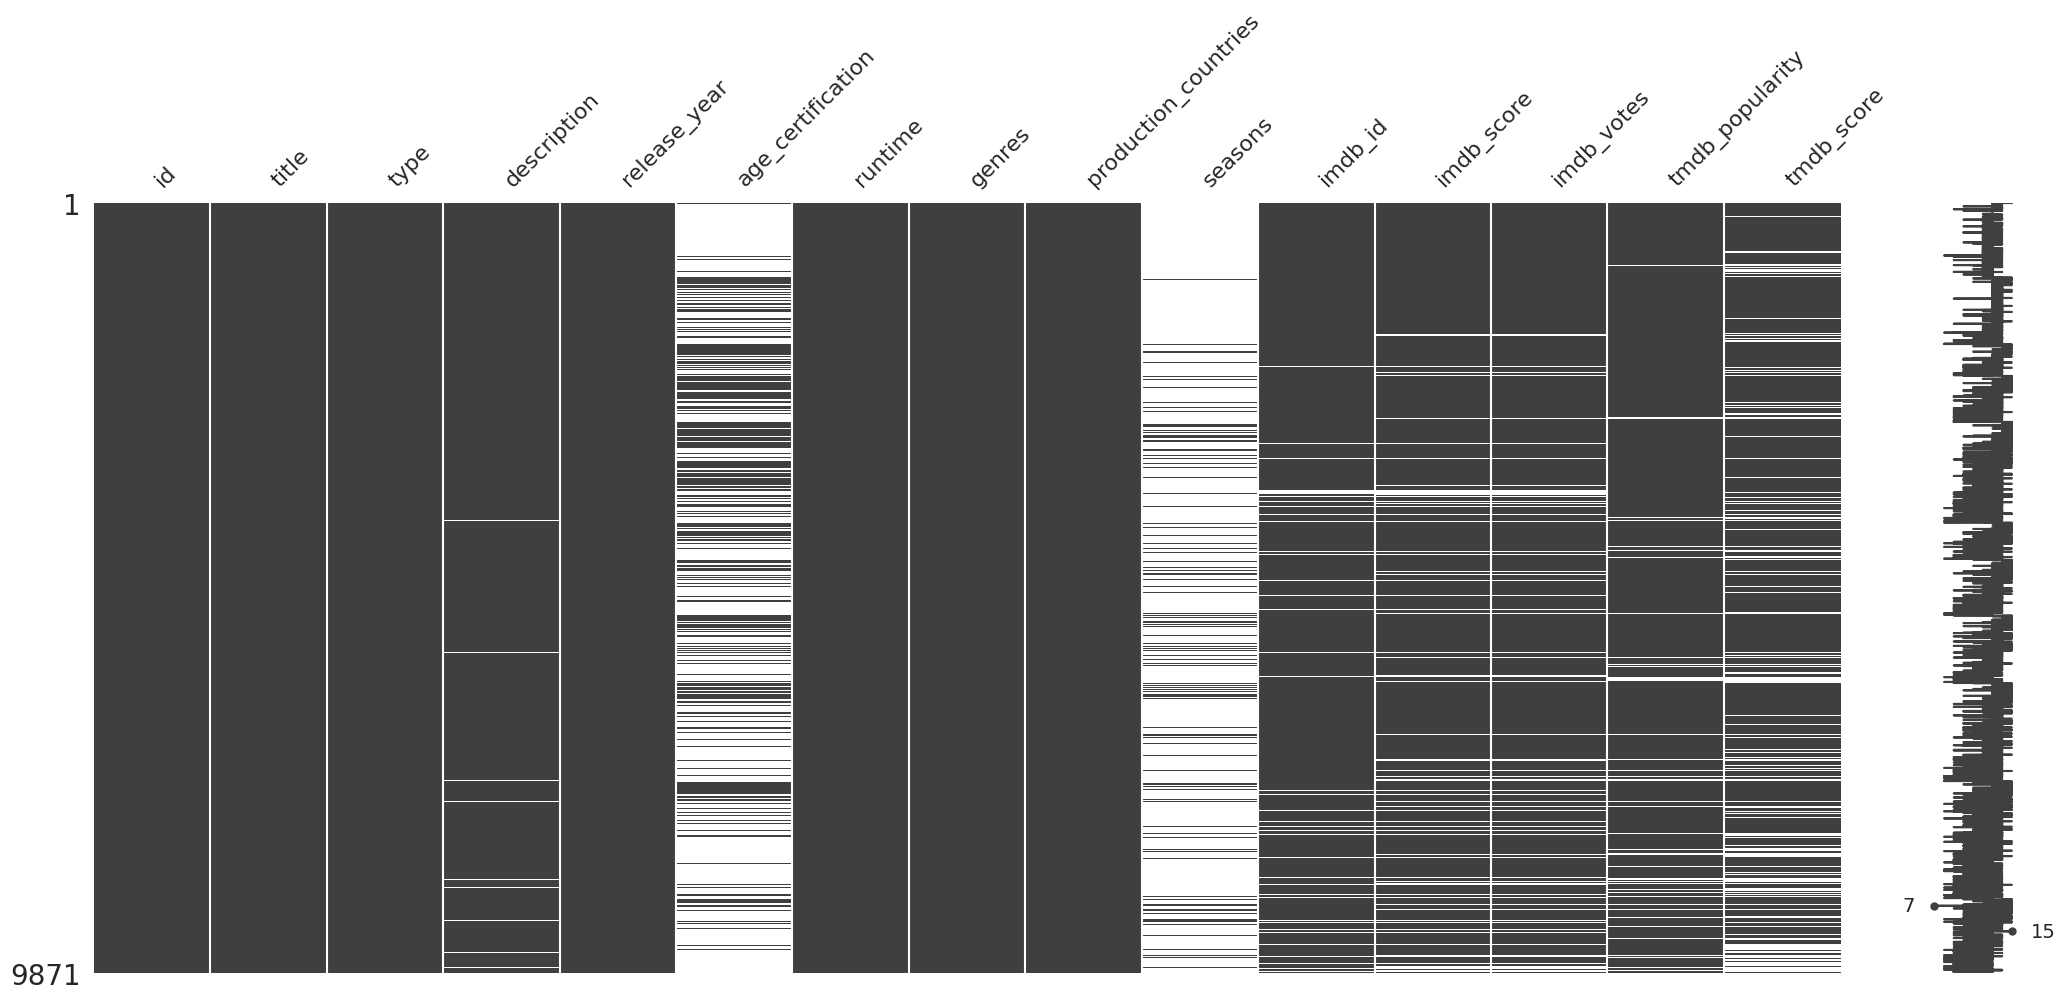

In [12]:
msno.matrix(titles)

## 📊 Content Type Distribution

<ipython-input-14-48f3a6dad59a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titles, x='type', palette='Set2')


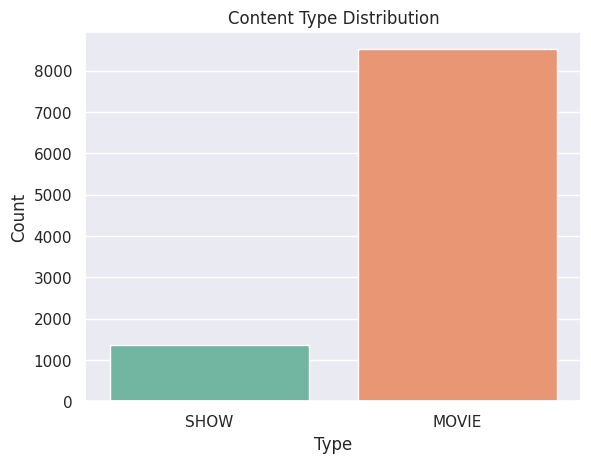

In [14]:
sns.countplot(data=titles, x='type', palette='Set2')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## 🎭 Top 10 Genres

<ipython-input-15-d4abab793a3b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


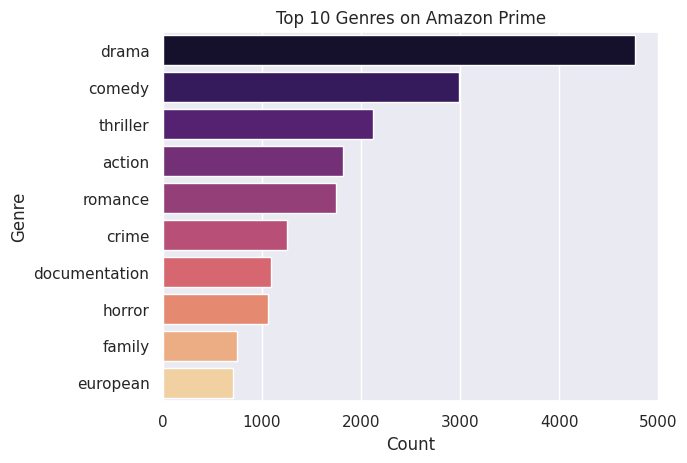

In [15]:
titles['genres'] = titles['genres'].fillna("[]")
genres_series = titles['genres'].str.strip("[]").str.replace("'", "").str.split(", ")
genre_flat = pd.Series([g for sublist in genres_series for g in sublist if g != ''])
top_genres = genre_flat.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 10 Genres on Amazon Prime')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## 📅 Content by Release Year

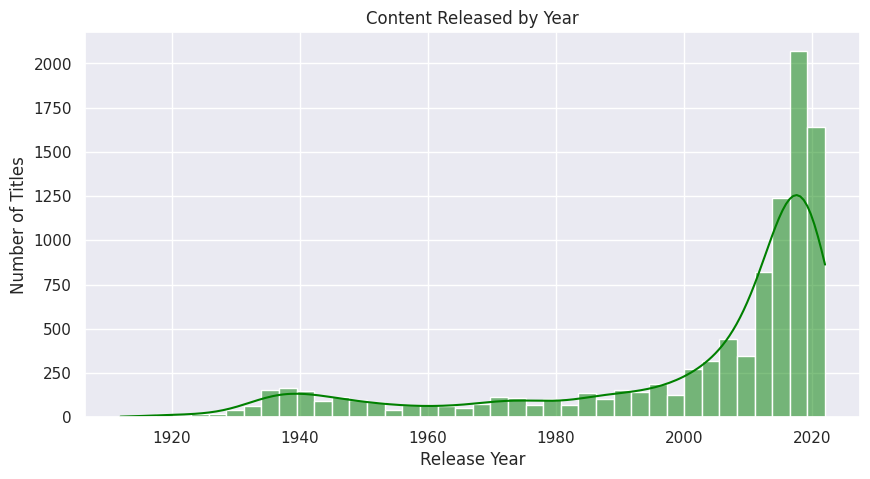

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data=titles, x='release_year', bins=40, kde=True, color='green')
plt.title('Content Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

## ⭐ IMDb Score Distribution

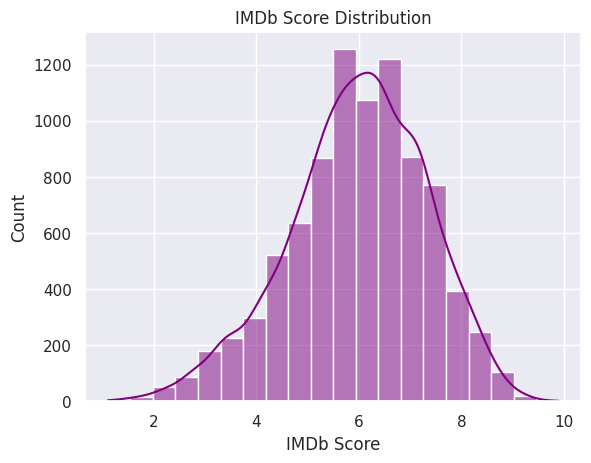

In [17]:
sns.histplot(data=titles, x='imdb_score', bins=20, kde=True, color='purple')
plt.title('IMDb Score Distribution')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.show()

## ⏱️ Runtime by Type

<ipython-input-18-79f452a69fb6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titles, x='type', y='runtime', palette="coolwarm")


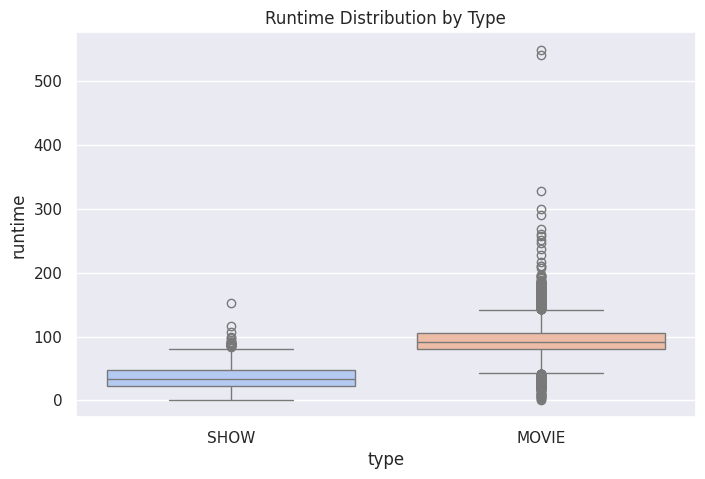

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(data=titles, x='type', y='runtime', palette="coolwarm")
plt.title('Runtime Distribution by Type')
plt.show()

## 👥 Top 10 Actors

<ipython-input-19-3c2744fc1645>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')


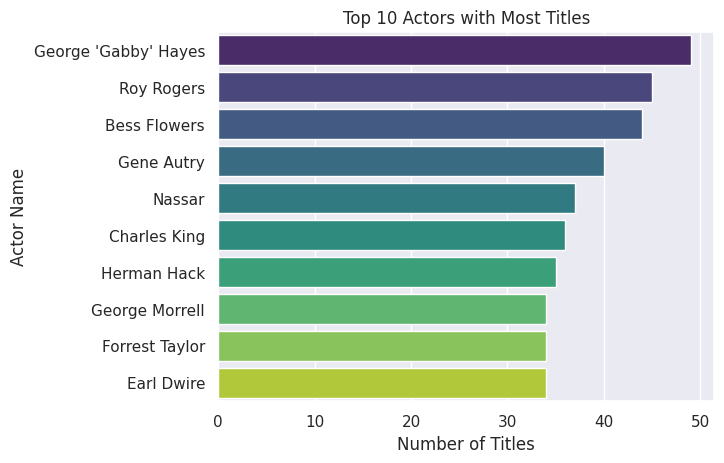

In [19]:
top_actors = credits[credits['role'] == 'ACTOR']['name'].value_counts().head(10)
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')
plt.title('Top 10 Actors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor Name')
plt.show()